===========iteration:0===========
SGD:2.373923081634352
Momentum:2.3616931599280195
AdaGrad:2.1356035110798866
Adam:2.19431343408528
===========iteration:100===========
SGD:1.6401622341581437
Momentum:0.2940893461746963
AdaGrad:0.14532368336812915
Adam:0.28589217812189593
===========iteration:200===========
SGD:0.900374682019277
Momentum:0.31898642036742414
AdaGrad:0.11077435736400591
Adam:0.19922165018103055
===========iteration:300===========
SGD:0.5249302345063751
Momentum:0.14578243996849133
AdaGrad:0.05379997473859745
Adam:0.06845849576101863
===========iteration:400===========
SGD:0.45852789671828104
Momentum:0.1919263167715809
AdaGrad:0.0465437469640432
Adam:0.15944224048860867
===========iteration:500===========
SGD:0.3880788914230198
Momentum:0.1939615202138681
AdaGrad:0.10962049892642563
Adam:0.15483543065733443
===========iteration:600===========
SGD:0.49351666646719483
Momentum:0.16047333308556247
AdaGrad:0.05238147600906068
Adam:0.07466497817230844
===========iteration:700

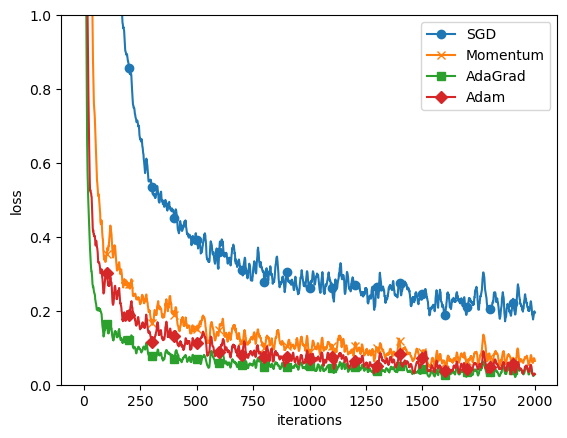

In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()